## Course Announcements 

- Exams available in all CodingLabs today
- You should have a good idea about what your project topic by the end of this week
- CodingLab Attendance: Week 8; Week 9

## APIs

**LISC example**
- will work on datahub
- did not work on Monday b/c LISC changed their API
    - I was using an old version
    - I have updated the notes on the website
    - I should have double checked this before class

- Authors did not change the major version of their software
    - Gives me an opportunity to talk about software versioning!

## Software Versioning

When you make changes to the software you've released into the world, you have to change the version of that software to let people know changes have occurred.

### Versioning Schemes

The rules, if you're new to this can be [dizzying](https://www.python.org/dev/peps/pep-0440/#version-scheme), so we'll [simplify](https://www.python.org/dev/peps/pep-0396/) for now:

- `<MAJOR>.<MINOR>`
    - i.e. 1.3
    
- `<MAJOR>.<MINOR>.<MAINTENANCE>`
    - i.e. 1.3.1

- `<MAJOR>` - increase by 1 w/ incompatible API changes
- `<MINOR>` - increase by 1 w/ added functionality in a backwards-compatible manner
- `<MAINTENANCE>` - (aka patch) inrease by 1 w/  backwards-compatible bug fixes.

In Python package development... when `<MAJOR>` == 0, suggests a package in development

In [1]:
# see version information
!pip show lisc

Name: lisc
Version: 0.1.1
Summary: Literature Scanner
Home-page: https://github.com/lisc-tools/lisc
Author: Thomas Donoghue
Author-email: tdonoghue.research@gmail.com
License: Apache License, 2.0
Location: /Users/shannonellis/.local/lib/python3.6/site-packages
Requires: beautifulsoup4, numpy, nltk, lxml, requests
Required-by: 


In [2]:
# see version information
import lisc
lisc.__version__

'0.1.1'

## Exam Review

- [Exam #2 (Blank)](https://cogs18.github.io/assets/intro/exams/E2_Fa19.pdf)
- [Exam #2 (Answers)](https://cogs18.github.io/assets/intro/exams/E2_Fa19_answer.pdf)
- [Exam #2 (Code)](https://cogs18.github.io/materials/E2-Answers)

# Scientific Computing

<div class="alert alert-success">
<b>Scientific Computing</b> is the application of computer programming to scientific applications: data analysis, simulation & modelling, plotting, etc. 
</div>

## Scientific Python: Scipy Stack

Scipy = Scientific Python

<div class="alert alert-success">
<b><code>Scipy</code></b> is an <i>ecosystem</i>, including a collection of open-source packages for scientific computing in Python.
</div>

A 'family' of packages that all work well together to do scientific computing.

Not made by the same people who manage the standard library.

## Homogenous Data

- for example: store data of the same type (i.e. all numerics)
- recordings of values from experimental participants
- heights or quantitative information from survey data

Lists are a start, and lists of lists are possible.

But, they can get nightmareish.

So we use arrays.

### `numpy`

**`numpy`** - stands for numerical python

**arrays** - work with arrays (matrices)

Allow you to efficiently operate on arrays (linear algebra, matrix operations, etc.)

In [3]:
import numpy as np

In [5]:
# Create some arrays of data
arr0 = np.array([1, 2, 3])
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

In [6]:
arr1

array([[1, 2],
       [3, 4]])

In [7]:
# lists of lists don't store dimensionality well
[[1, 2], [3, 4]] 

[[1, 2], [3, 4]]

#### Indexing Arrays

In [8]:
# Check out an array of data
arr1

array([[1, 2],
       [3, 4]])

In [9]:
# Check the shape of the array
arr1.shape

(2, 2)

In [10]:
# Index into a numpy array
arr1[0, 0]

1

Working with N-dimensional (multidimensional) arrays is easy within `numpy`.

#### Notes on Arrays

In [11]:
# arrays are most helpful when they
# have the same length in each list
np.array([[1, 2, 3, 4], [2, 3, 4]])

array([list([1, 2, 3, 4]), list([2, 3, 4])], dtype=object)

In [12]:
# arrays are meant to store homogeneous data
np.array([[1, 2, 'cogs18'], [2, 3, 4]])

array([['1', '2', 'cogs18'],
       ['2', '3', '4']], dtype='<U21')

#### Working with Arrays

(Things you can't do with lists)

In [13]:
# Add arrays together
arr1 + arr2

array([[ 6,  8],
       [10, 12]])

In [14]:
# Matrix mutliplication
arr1 * arr2

array([[ 5, 12],
       [21, 32]])

#### A brief aside: `zip()`

`zip()` takes two iterables (things you can loop over) and loop over them together.

In [15]:
for a, b in zip([1,2], ['a','b']):
    print(a, b)

1 a
2 b


### Clicker Question #1

Given the following code, what will it print out?

In [16]:
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8]])
 
output = []
for d1, d2 in zip(data[0, :], data[1, :]):
    output.append(d1 + d2)

print(output)

[6, 8, 10, 12]


- A) [1, 2, 3, 4]
- B) [1, 2, 3, 4, 5, 6, 7, 8]
- C) [6, 8, 10, 12]
- D) [10, 26]
- E) [36]

Note that if you find yourself looping over arrays...there is probably a better way.

In [17]:
data.sum()

36

In [18]:
data.sum(axis=0)

array([ 6,  8, 10, 12])

## Heterogenous Data

- have continuous (numeric) and categorical (discrete) data
- different data types need to be stored
- uses a DataFrame object (think: spreadsheet)
- allows for column and row labels

### pandas

In [19]:
import pandas as pd

In [20]:
# Create some example heterogenous data
d1 = {'Subj_ID': '001', 'score': 16, 'group' : 2, 'condition': 'cognition'}
d2 = {'Subj_ID': '002', 'score': 22, 'group' : 1, 'condition': 'perception'}

In [21]:
# Create a dataframe 
df = pd.DataFrame([d1, d2], [0, 1])

In [22]:
# Check out the dataframe
df

,Subj_ID,condition,group,score
0,001,cognition,2,16
1,002,perception,1,22


In [23]:
# You can index in pandas
df['condition']

0     cognition
1    perception
Name: condition, dtype: object

In [24]:
# You can index in pandas
df.loc[0,:]

Subj_ID            001
condition    cognition
group                2
score               16
Name: 0, dtype: object

#### Working with DataFrames

In [25]:
df.describe()

,group,score
count,2.000000,2.000000
mean,1.500000,19.000000
std,0.707107,4.242641
min,1.000000,16.000000
25%,1.250000,17.500000
50%,1.500000,19.000000
75%,1.750000,20.500000
max,2.000000,22.000000


In [26]:
# Take the average of all numeric columns
df.mean()

Subj_ID    501.0
group        1.5
score       19.0
dtype: float64

### Clicker Question #2

Comparing them to standard library Python types, which is the best mapping for these new data types?

- A) DataFrames are like lists, arrays are like tuples
- B) DataFrames and arrays are like lists
- C) DataFrames are like tuples, arrays are like lists
- D) DataFrames and arrays are like dictionaries
- E) Dataframes are like dictionaries, arrays are like lists

## Plotting

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

In [28]:
# Create some data
dat = np.array([1, 2, 4, 8, 16, 32])

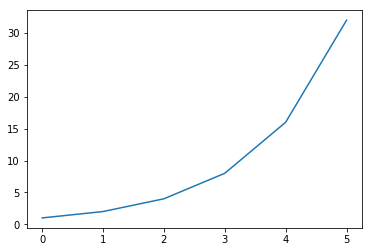

In [29]:
# Plot the data
plt.plot(dat);

- can change plot type
- _lots_ of customizations possible

## Analysis

- `scipy` - statistical analysis
- `sklearn` - machine learning

In [30]:
import scipy as sp
from scipy import stats

In [31]:
# Simulate some data
d1 = stats.norm.rvs(loc=0, size=1000)
d2 = stats.norm.rvs(loc=0.5, size=1000)

### Analysis - Plotting the Data

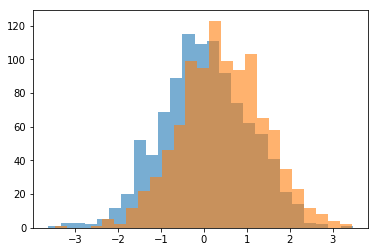

In [32]:
# Plot the data
plt.hist(d1, 25, alpha=0.6);
plt.hist(d2, 25, alpha=0.6);

### Analysis - Statistical Comparisons

In [33]:
# Statistically compare the two distributions
stats.ttest_ind(d1, d2)

Ttest_indResult(statistic=-9.298563025061306, pvalue=3.609303586981146e-20)

## COGS108: Data Science in Practice

<div class="alert alert-info">
If you are interested in data science and scientific computing in Python, consider taking <b>COGS108</b> : <a>https://github.com/COGS108/</a>.
</div>